In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("nycopen_metadata.csv")

In [3]:
df.head()

,resource_id,name,agency,description,contact,n_downloads,category,percent_datatypes,percent_descriptions
0,vx8i-nprf,Civil Service List (Active),Department of Citywide Administrative Services...,A Civil Service List consists of all candidate...,NaN,51006,City Government,1.0,1.0
1,ic3t-wcy2,DOB Job Application Filings,Department of Buildings (DOB),This dataset contains all job applications sub...,NaN,37213,Housing & Development,1.0,1.0
2,dpec-ucu7,TLC New Driver Application Status,Taxi and Limousine Commission (TLC),THIS DATASET IS UPDATED SEVERAL TIMES PER DAY....,NaN,35485,Transportation,1.0,1.0
3,8wbx-tsch,For Hire Vehicles (FHV) - Active,Taxi and Limousine Commission (TLC),"PLEASE NOTE: This dataset, which includes all ...",NaN,256759,Transportation,1.0,1.0
4,xjfq-wh2d,For Hire Vehicles (FHV) - Active Drivers,Taxi and Limousine Commission (TLC),"PLEASE NOTE: This dataset, which includes all ...",NaN,224307,Transportation,1.0,1.0


In [4]:
df['category'].value_counts()

category
Education                1097
City Government           672
Transportation            181
Housing & Development     169
Social Services           149
Environment               122
Public Safety              98
Health                     74
Business                   58
Recreation                 35
NYC BigApps                 3
Name: count, dtype: int64

In [5]:
# create a table with summary statistics by agency
agency_stats = df.groupby(['agency', 'category'], as_index=False).agg(
    n_datasets = pd.NamedAgg(column = 'agency', aggfunc = "count"),
    avg_percent_datatypes = pd.NamedAgg(column = 'percent_datatypes', aggfunc = "mean"),
    avg_percent_description = pd.NamedAgg(column = 'percent_descriptions', aggfunc = "mean")).sort_values("avg_percent_description", ascending = False)

In [6]:
# create a table with summary statistics by category
category_stats = df.groupby('category', as_index=False).agg(
    n_datasets = pd.NamedAgg(column = 'category', aggfunc = "count"),
    avg_percent_datatypes = pd.NamedAgg(column = 'percent_datatypes', aggfunc = "mean"),
    avg_percent_description = pd.NamedAgg(column = 'percent_descriptions', aggfunc = "mean")).sort_values("avg_percent_description", ascending = False)

In [7]:
# take a look at 
category_stats.head(20)

,category,n_datasets,avg_percent_datatypes,avg_percent_description
4,Health,74,1.000000,0.707690
7,Public Safety,98,1.000000,0.599067
1,City Government,672,1.000000,0.524995
0,Business,58,1.000000,0.506522
5,Housing & Development,169,1.000000,0.446861
9,Social Services,149,1.000000,0.444243
10,Transportation,181,1.000000,0.435602
3,Environment,122,1.000000,0.418919
8,Recreation,35,1.000000,0.417857
2,Education,1097,0.948952,0.019247


In [ ]:
# is there a specific agency within education that's driving down the stats?

In [8]:
agency_stats[agency_stats['category'] == 'Education']

,agency,category,n_datasets,avg_percent_datatypes,avg_percent_description
47,Department of Environmental Protection (DEP),Education,1,1.00000,1.000000
59,Department of Parks and Recreation (DPR),Education,1,1.00000,1.000000
158,Queens Library (QBPL),Education,1,1.00000,0.656250
159,School Construction Authority (SCA),Education,34,1.00000,0.114177
43,Department of Education (DOE),Education,1038,0.94605,0.014043
7,Brooklyn Borough President (BPBK),Education,3,1.00000,0.000000
79,Department of Youth and Community Development ...,Education,19,1.00000,0.000000


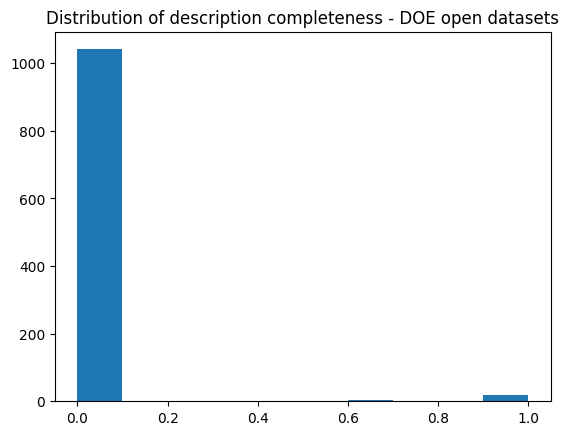

In [9]:
plt.hist(df[df['agency'] == 'Department of Education (DOE)']['percent_descriptions'])
plt.title('Distribution of description completeness - DOE open datasets')
plt.show()

In [10]:
# does documentation influence number of downloads?
np.corrcoef(df['n_downloads'], df['percent_descriptions'])[0,1]

0.04886921618029236

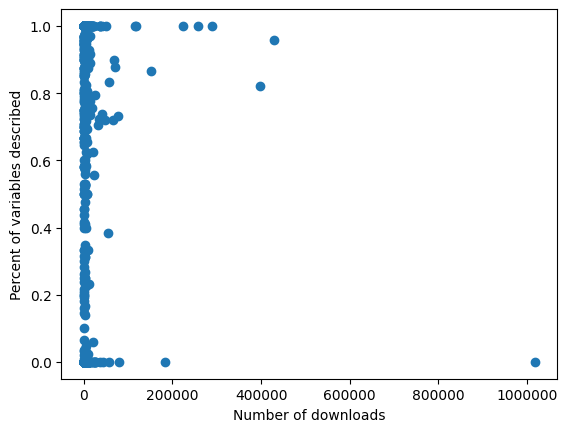

In [11]:
plt.scatter(df['n_downloads'], df['percent_descriptions'])
plt.ticklabel_format(style='plain')   # prevent scientific notation
plt.xlabel("Number of downloads")
plt.ylabel("Percent of variables described")
plt.show()

In [14]:
# curious about the dataset with an extremely high number of downloads - 
# it's demographic statistics by zip code
# and it's not very well documented

df.sort_values('n_downloads', ascending = False)

,resource_id,name,agency,description,contact,n_downloads,category,percent_datatypes,percent_descriptions
34,kku6-nxdu,Demographic Statistics By Zip Code,Department of Youth and Community Development ...,Demographic statistics broken down by zip code,NaN,1017553,City Government,1.0,0.000000
868,yhdx-itry,Overhead Electronic Signs,Department of Transportation (DOT),Electronic Signs are used to display dynamic m...,NaN,429581,Transportation,1.0,0.958333
6,erm2-nwe9,311 Service Requests from 2010 to Present,311,Please note: Due to pandemic call handling mod...,NaN,398678,Social Services,1.0,0.820000
9,jb3k-j3gp,Medallion Drivers - Active,Taxi and Limousine Commission (TLC),"PLEASE NOTE: This dataset, which includes all ...",NaN,288920,Transportation,1.0,1.000000
3,8wbx-tsch,For Hire Vehicles (FHV) - Active,Taxi and Limousine Commission (TLC),"PLEASE NOTE: This dataset, which includes all ...",NaN,256759,Transportation,1.0,1.000000
...,...,...,...,...,...,...,...,...,...
2410,mfz4-pj9t,RFP Summary by Agency and Fiscal Year,Mayor's Office of Contract Services (MOCS),NaN,NaN,25,City Government,1.0,1.000000
2475,dzvt-6g3v,311 Interpreter Wait Time,Office of Technology and Innovation (OTI),This data set contains wait times experienced ...,NaN,24,City Government,1.0,1.000000
2660,gc8d-bnmn,Parking Permit for People with Disabilities (P...,Department of Transportation (DOT),Parking Permits for People with Disabilities (...,NaN,22,Transportation,1.0,1.000000
2740,4te8-9n3p,Holiday Construction Embargo- Block,Department of Transportation (DOT),This dataset shows all street blocks with acti...,NaN,14,Transportation,1.0,1.000000
